<a href="https://colab.research.google.com/github/doloresgarro/Deep-Learning/blob/main/Pr%C3%A1ctica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3 - Deep learning**
*Descenso de gradiente. Combinador lineal*

# **Ejercicio 1**

*a) Indique el vector gradiente para 𝑥 = e 𝑦 = −1*

In [ ]:
import numpy as np
import grafica as gr # distinta a la anterior
import math

def funcion(x,y):
    z = x / (2*x**2 + 3*y**2 + 1)
    return z

def derivadaPX(x, y):
    dx = (-2*x**2 + 3*y**2 + 1) / (2*x**2 + 3*y**2 + 1)**2
    return dx

def derivadaPY(x, y):
    dy = -6*x*y / (2*x**2 + 3*y**2 + 1)**2
    return dy

#print(" %f" % funcion(1,1))
print("Vector gradiente para x = 1: %f" % derivadaPX(1,-1))
print("Vector gradiente para y = -1: %f" % derivadaPY(1,-1))

Vector gradiente para x = 1: 0.055556
Vector gradiente para y = -1: 0.166667


*b) Si a partir de (𝑥 = 0.20; 𝑦 = −1) tuviera que elegir una
dirección en la cual la función crezca, qué acción
tomaría?*

*i. Incrementar los valores de x e y*

*ii. Disminuir los valores de x e y*

*iii. Incrementar el valor de x y disminuir el de y*

*iv. Disminuir el valor de x e incrementar el de y*

In [ ]:
print("Vector gradiente para x = 1: %f" % derivadaPX(0.2,-1))
print("Vector gradiente para y = -1: %f" % derivadaPY(0.2,-1))

Vector gradiente para x = 1: 0.235486
Vector gradiente para y = -1: 0.072088


La opción correcta sería la i. Incrementar los valores de x e y --> debido a que el gradiente nos indica la dirección de máximo crecimiento, por lo tanto como los valores nos dan positivos en x e y indica que la función crece.


*c) Una vez elegida la dirección en b), el movimiento a realizar será una fracción del módulo del vector gradiente.*

*¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎 = 0.1? ¿cuál es el valor de la función en
la nueva ubicación?*

In [ ]:
# Posición actual
x = 0.2
y = -1
print("Posicion actual: %f" % funcion(x, y))

# Nuevos x e y
alfa = 0.1
xNuevo = x - alfa * derivadaPX(0.2, -1)
yNuevo = y - alfa* derivadaPY(0.2, -1)

print("Posicion nueva: %f" % funcion(xNuevo, yNuevo))


Posicion actual: 0.049020
Posicion nueva: 0.042977


*d) Considere nuevamente las opciones del inciso b) pero ahora debe buscar una dirección, a partir de (𝑥 = 0.20; 𝑦 = −1), en la cual la función disminuya ¿cuál sería su elección?*



In [ ]:
print("Vector gradiente para x = 1: %f" % derivadaPX(0.2,-1))
print("Vector gradiente para y = -1: %f" % derivadaPY(0.2,-1))

Vector gradiente para x = 1: 0.235486
Vector gradiente para y = -1: 0.072088


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import meshgrid
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import math


## se crean arreglos desde -5 hasta 5 con un paso de 0.25
RNG = 5.0
x = np.arange(-RNG, RNG, RNG/20)
y = np.arange(-RNG, RNG, RNG/20)

# define la grilla de puntos
X, Y = meshgrid(x, y)

def funcion(x,y):
    z = x / (2*x**2 + 3*y**2 + 1)
    return z

def derivadaPX(x, y):
    dx = (-2*x**2 + 3*y**2 + 1) / (2*x**2 + 3*y**2 + 1)**2
    return dx

def derivadaPY(x, y):
    dy = -6*x*y / (2*x**2 + 3*y**2 + 1)**2
    return dy

z = funcion(X, Y)

#graficar3D(R, H, Z)
# asignar r y h con el punto inicial
(x,y) = (0.5, 0)

# este punto genera OverflowError: 'Numerical result out of range'
# se "cae" a -infinito
#(r,h) = (1.5, 1)

# valor para controlar el paso del gradiente
alfa = 0.1

MAX_ITE = 100 # cantidad max de iteraciones
ite = 1

v_new = funcion(x, y)   # valor inicial
v = v_new - 1 # fuerza entrada al while

try:
    # repite bucle mientras no alcance el maximo de iteraciones o la cota de error
    # math.fabs() --> devuelve el valor absoluto del parámetro
    while ((ite < MAX_ITE) and (math.fabs(v - v_new) > 10e-6)):
        v = v_new
        # PtoAnt = [r, h, v]
        grad_x = derivadaPX(x, y) # derivada respecto de r en punto actual
        grad_y = derivadaPY(x, y) # derivada respecto de h en punto actual

        x = x - alfa * grad_x             # avanza en dirección al gradiente en x
        y = y - alfa * grad_y             # avanza en dirección al gradiente en y

        v_new = x / (2*x**2 + 3*y**2 + 1)      # calcula valor en nueva posicion

        ite = ite + 1

    print("iteraciones = %d   r= %.5f   h=%.5f   v=%.8f" % (ite,x,y,v_new))
except OverflowError as e:
    print("Oooops: después de la iteracion %d algún valor tiende a infinito:\n r = %.1e \n h = %.1e" % (ite, x,y))


iteraciones = 52   r= -0.69450   h=0.00000   v=-0.35349615


*   Para (x,y) = (0.2, -1.2) --> iteraciones = 100,   r= -0.74819,   h=-0.03099,   v=-0.35251105
*  Para (x,y) = (0.5, 1.2) --> iteraciones = 100,   r= -0.85918,   h=0.68873,   v=-0.22033486 --> MAS CHICO

* Para (x,y) = (0.5, 0) --> iteraciones = 52,   r= -0.69450,   h=0.00000,   v=-0.35349615



# **Ejercicio 2**

Utilice la técnica del descenso de gradiente para calcular el mínimo de las siguientes funciones:

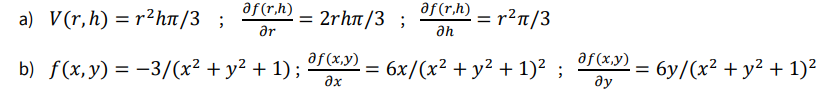



Se desea utilizar la técnica de descenso de gradiente para minimizar la función f(x,y) del ejercicio 1 de la práctica 3.

Se hicieron varias ejecuciones con distintos puntos de inicio. En todos los casos se utilizó MAX_ITE = 100, una cota de 10e-06 para el valor absoluto de la diferencia de dos valores consecutivos de la función y un valor del factor alfa de 0.1 indique cuáles de las siguientes configuraciones logra encontrar el menor valor de la función:

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import meshgrid
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
import math

# se crean arreglos desde -5 hasta 5 con un paso de 0.25
RNG = 5.0
h = np.arange(-RNG, RNG, RNG/20)
v = np.arange(-RNG, RNG, RNG/20)

# define la grilla de puntos
R, H = meshgrid(h, v)

def funcion(r,h):
    v = (r**2 * h * math.pi)/3
    return v

def derivadaPR(r, h):
    dr = (2 * r * math.pi)/3
    return dr

def derivadaPH(r, h):
    dh = (r**2 * math.pi)/3
    return dh



z = funcion(R, H)

#graficar3D(R, H, Z)
# asignar r y h con el punto inicial
(r,h) = (1, 6)

# este punto genera OverflowError: 'Numerical result out of range'
# se "cae" a -infinito
#(r,h) = (1.5, 1)

# valor para controlar el paso del gradiente
alfa = 0.05

MAX_ITE = 100 # cantidad max de iteraciones
ite = 1

v_new = funcion(r, h)   # valor inicial
v = v_new - 1 # fuerza entrada al while

try:
    # repite bucle mientras no alcance el maximo de iteraciones o la cota de error
    while ((ite < MAX_ITE) and (math.fabs(v - v_new) > 10e-6)):
        v = v_new
        # PtoAnt = [r, h, v]
        grad_x = derivadaPR(r, h) # derivada respecto de r en punto actual
        grad_y = derivadaPH(r, h) # derivada respecto de h en punto actual

        r = r - alfa * grad_x             # avanza en dirección al gradiente en x
        h = h - alfa * grad_y             # avanza en dirección al gradiente en y

        v_new = r**2 * h * math.pi/3      # calcula valor en nueva posicion

        ite = ite + 1

    print("iteraciones = %d   r= %.5f   h=%.5f   v=%.8f" % (ite,r,h,v_new))
except OverflowError as e:
    print("Oooops: después de la iteracion %d algún valor tiende a infinito:\n r = %.1e \n h = %.1e" % (ite, r,h))


iteraciones = 55   r= 0.00255   h=5.73619   v=0.00003892




*  Para (r = 1, h = 6) --> iteraciones = 55,   r= 0.00255,   h=5.73619, v=0.00003892

*  Para (r = 5, h = 5) --> iteraciones = 64,   r= 0.00470,   h=-1.59532,   v=-0.00003695

*  Para (r = 0.6, h = 1.3) --> iteraciones = 44,   r= 0.00516,   h=1.20503,   v=0.00003356


# **Ejercicio 4**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import meshgrid
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
import math

# se crean arreglos desde -5 hasta 5 con un paso de 0.25
RNG = 5.0
k = np.arange(-RNG, RNG, RNG/20)
w = np.arange(-RNG, RNG, RNG/20)

# define la grilla de puntos
K, W = meshgrid(k, w)

def funcion(k,w):
    P = k**2 - 2*w*k + 2*(w**2) + 18*w - 20*k + 201
    return P

def derivadaPK(k, w):
    dk = 2*k - 2*w - 20
    return dk

def derivadaPJ(k, w):
    dw = -2*k + 4*w + 18
    return dw

z = funcion(K, W)

#graficar3D(R, H, Z)
# asignar r y h con el punto inicial
(k,w) = (16, 78)

# este punto genera OverflowError: 'Numerical result out of range'
# se "cae" a -infinito
#(r,h) = (1.5, 1)

# valor para controlar el paso del gradiente
alfa = 0.2

MAX_ITE = 100 # cantidad max de iteraciones
ite = 1

v_new = funcion(k, w)   # valor inicial
v = v_new - 1 # fuerza entrada al while

try:
    # repite bucle mientras no alcance el maximo de iteraciones o la cota de error
    while ((ite < MAX_ITE) and (math.fabs(v - v_new) > 10e-05)):
        v = v_new
        # PtoAnt = [r, h, v]
        grad_k = derivadaPK(k, w) # derivada respecto de r en punto actual
        grad_w = derivadaPJ(k, w) # derivada respecto de h en punto actual

        k = k - alfa * grad_k             # avanza en dirección al gradiente en x
        w = w - alfa * grad_w             # avanza en dirección al gradiente en y

        v_new = k**2 - 2*w*k + 2*(w**2) + 18*w - 20*k + 201    # calcula valor en nueva posicion

        ite = ite + 1

    print("iteraciones = %d   r= %.5f   h=%.5f   v=%.8f" % (ite,k,w,v_new))
except OverflowError as e:
    print("Oooops: después de la iteracion %d algún valor tiende a infinito:\n r = %.1e \n h = %.1e" % (ite, k,w))


iteraciones = 46   r= 11.02188   h=1.01352   v=100.00025274



*  Para (k=5,j=2) ; alfa = 0.05 --> iteraciones = 100,   r= 10.89419,   h=0.93461,   v=100.00590950

*  Para (k=200,j=-6) ; alfa = 0.3 --> iteraciones = 36,   r= 11.01536,   h=1.00949,   v=100.00012453 --> MEJOR APROXIMACION

*  Para (k=16,j=78) ; alfa = 0.2  --> iteraciones = 46,   r= 11.02188,   h=1.01352,   v=100.00025274


----------------------------------
En este ejercicio lo hice como (k,w) --> y era (w,k).
Tambien use w en vez de j porque me tiraba que era numero complejo

# **Ejercicio 5**

A partir de las siguientes calificaciones de alumnos de curso, se desea
obtener la recta de regresión que permita predecir la nota que un estudiante obtendrá en Física a partir de su calificación obtenida en Matemáticas.

a) Calcule la correlación lineal entre estas dos variables y dibuje el
diagrama de dispersión correspondiente. ¿La recta de regresión
será de utilidad?

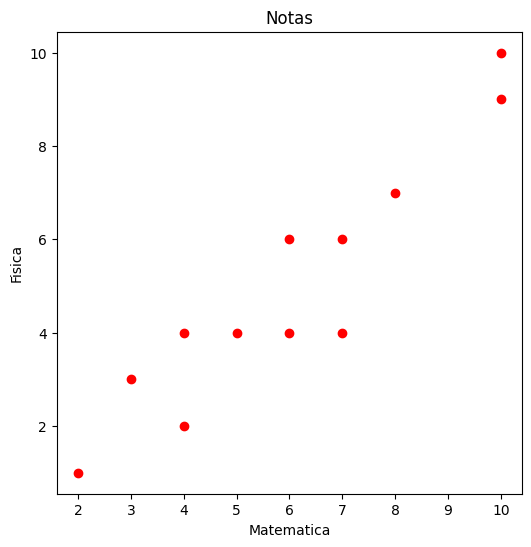


Coef de correlación lineal: 


array([[1.        , 0.93550714],
       [0.93550714, 1.        ]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import meshgrid #,imshow,contour
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Valores para Matemática
matematica = [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]

# Valores para Fisica (en una escala de 0 a 10, correlacionados positivamente)
fisica = [1, 3, 2, 4, 4, 4, 6, 4, 6, 7, 9, 10]

X = np.array(matematica) # vector de notas matemática
Y = np.array(fisica) # vector de notas física

# grafica para ver correlación
plt.figure(figsize=(6,6))
plt.plot(X, Y,'o', color='red')
plt.title('Notas')
plt.xlabel('Matematica')
plt.ylabel('Fisica')
plt.show()

#El coeficiente de correlación es una medida estadística que indica la relación lineal entre dos conjuntos de datos. Puede tener valores en el rango de -1 a 1:
# 1 --> indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también lo hace de manera perfectamente lineal.
# -1 --> indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye de manera perfectamente lineal.
# cercano a 0 --> indica que no hay una correlación lineal fuerte entre las variables.
print()
print("Coef de correlación lineal: ")
np.corrcoef(X, Y) # es el de la pos corrcoef[0,1] = 0.9355.., como es cercano a 1 la correlación lineal es buena


b)Indique la ecuación del error cuadrático medio que se debería
minimizar si se utilizara la técnica de descenso de gradiente.


**Error Cuadrático Medio  (Mean Square Error)**
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$


Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que se quiere predecir) del ejemplo $i$.
- $\hat{y}_i$ es la predicción del modelo para el ejemplo $i$.


c) Indique la ecuación de error que se minimiza al utilizar la técnica de
descenso de gradiente estocástico. ¿qué ventaja tiene su uso con
respecto a la ecuación indicada en b)?





d) Utilice la técnica de descenso de gradiente estocástico para obtener
los coeficientes de la recta de regresión que permita predecir la nota
que un estudiante obtendrá en Física a partir de su calificación
obtenida en Matemáticas.


In [ ]:
from ClassNeuronaLineal import NeuronaLineal

m = np.array(matematica)
f = np.array(fisica)

# entrenamiento combinador lineal

# reshape --> cambia la forma de los arreglos a matrices unidimensionales
# de tipo columna, es decir, matrices con una sola columna y tantas filas como elementos tenía el arreglo original.
m_train = m.reshape(-1,1)    # selecciona entradas y formatea a Nx1
f_train = f.reshape(-1,1)    # selecciona salidas y formatea a Nx1

# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.005, n_iter=500, cotaE=0.1, draw=0, title=['Matematica', 'Fisica'])
cant_entrenamientos = 100
for i in range(1, cant_entrenamientos):
      modelo = modelo.fit(m_train, f_train)
modelo = modelo.fit(m_train, f_train)

print('w =', modelo.w_[0])
print('b =', modelo.b_[0])

# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))


notaM = 9
notaM = 9
print('Quien saco %d en Matemática sacará un %d como nota en Fisica' % (notaM, modelo.predict([notaM])[0]))   # prediccion

w = 0.876777352273678
b = 0.5215059942273296
Errores:
  0 => 59.713618
  1 => 15.504168
  2 => 16.399327
  3 => 16.360458
Quien saco 9 en Matemática sacará un 8 como nota en Fisica


# **Ejercicio 9**

In [ ]:
import pandas as pd
# leer automobile.csv
datos = pd.read_csv("automobile-simple.csv")
nColum = list(datos.columns.values)
print (datos)

            make fuel-type num-of-doors   body-style  curb-weight  \
0    alfa-romero       gas          two  convertible         2548   
1    alfa-romero       gas          two  convertible         2548   
2    alfa-romero       gas          two    hatchback         2823   
3           audi       gas         four        sedan         2337   
4           audi       gas         four        sedan         2824   
..           ...       ...          ...          ...          ...   
200        volvo       gas         four        sedan         2952   
201        volvo       gas         four        sedan         3049   
202        volvo       gas         four        sedan         3012   
203        volvo    diesel         four        sedan         3217   
204        volvo       gas         four        sedan         3062   

     engine-size  horsepower  city-mpg  highway-mpg    price      volume  \
0            130       111.0        21           27  13495.0  528019.904   
1            130   

In [ ]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

#-- detectando la codificación de caracteres usada ----
with open('automobile-simple.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
# La función chardet.detect() toma como entrada el contenido del archivo leído con f.read() y devuelve
# información sobre la codificación detectada, incluyendo el nombre de la codificación.

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
datos = pd.read_csv('automobile-simple.csv', encoding=result['encoding'])

#print(df)

curb-weight    0
engine-size    0
horsepower     2
city-mpg       0
highway-mpg    0
price          4
volume         0
eco-rating     0
dtype: int64


<Axes: >

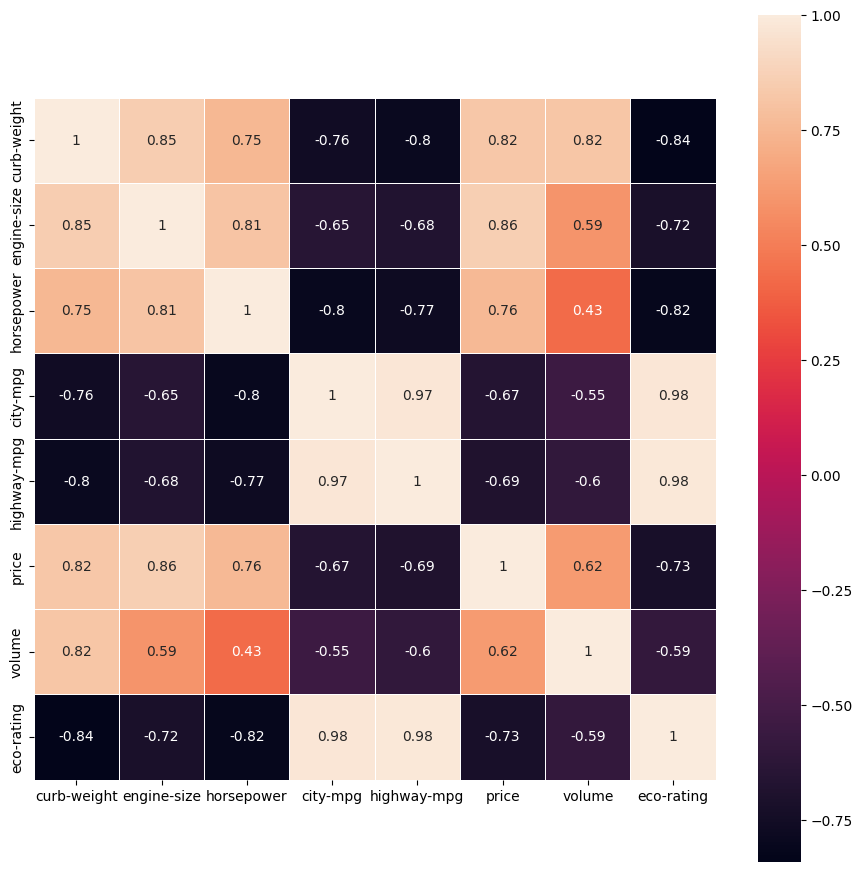

In [ ]:
#-- seleccionar los atributos numéricos --
datos = datos.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

# imprime valores nulos
print(datos.isnull().sum())


# crea un arreglo  los nombres de las columnas numéricas del df, obtiene los nombres de las columnas,
# .reshape(-1, 1) lo reformatea en una matriz de una sola columna.
nomAtrib = np.array(datos.columns.values).reshape(-1,1)

#-- ver si tienen datos faltantes --
#'make': datos['make'].mean(), 'fuel-type': datos['fuel-type'].mean(),'num-of-doors': datos['num-of-doors'].mean(),'body-style': datos['body-style'].mean(), 'alfa': datos['alfa'].mean()
values = { 'curb-weight': datos ['curb-weight'].mean(), 'engine-size': datos ['engine-size'].mean(),
           'horsepower': datos['horsepower'].mean(), 'city-mpg': datos['city-mpg'].mean(),
           'highway-mpg': datos['highway-mpg'].mean(), 'price': datos['price'].mean(),
           'volume': datos['volume'].mean(), 'eco-rating': datos['eco-rating'].mean() }


# reemplaza valores nulos por los indicados en el diccionario values
datos = datos.fillna(value=values)

# Imprime matriz de correclacion
corr = datos.corr() # matriz de correlación
plt.figure(figsize=(11,11))
# genera mapa de calor de la matriz de correlación lineal
sns.heatmap(corr, square=True,  annot=True, linewidths=.5)


Normalización: 1


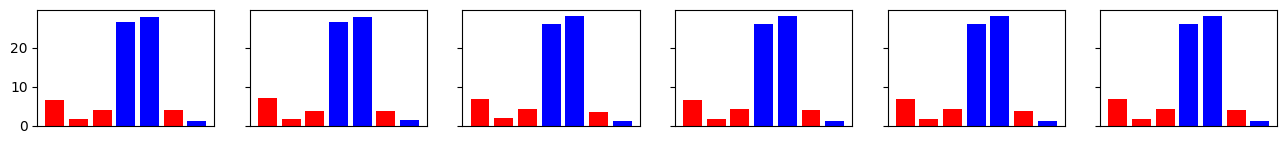

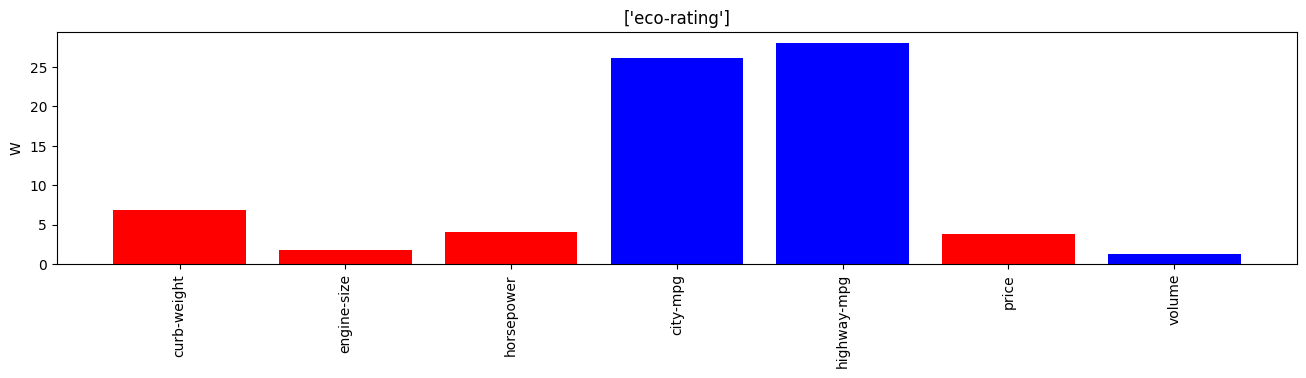

Normalización: 2


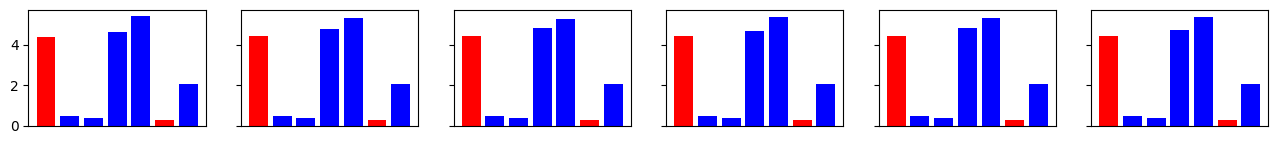

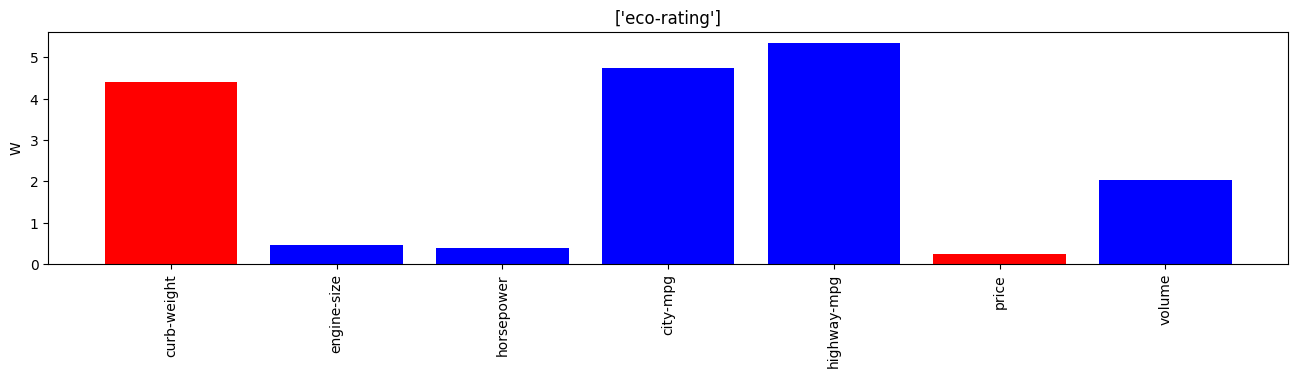

In [ ]:
Ejemplos = np.array(datos)

# separa aributos y target
attPred = 7 #12 mpg y 14 precio  #-- nro de atributo a predecir
T = Ejemplos[:, attPred].reshape(-1,1) # (N,) => (N,1)
Ejemplos = np.delete(Ejemplos, [attPred], 1) #elimina la columna 12 a lo largo del eje 1

nomPred = nomAtrib[attPred]
nomCols = np.delete(nomAtrib, [attPred])

#se realizaron 50 entrenamientos independientes con los siguientes parámetros alpha=0.01, n_iter=30 y cotaE=10e-06
# alpha=0.01, n_iter=30 y cotaE=10e-06:
alfa = 0.01
MAX_ITE = 30
CotaError = 10e-06
CANT_PLOTS = 6

for normalizarEntrada in [1, 2]:
    # normalización
    if normalizarEntrada == 1:
        normalizador = preprocessing.MinMaxScaler()
        X = normalizador.fit_transform(Ejemplos)
    elif normalizarEntrada == 2:
        normalizador = preprocessing.StandardScaler()
        X = normalizador.fit_transform(Ejemplos)
    else:
        X = Ejemplos

    w_acc = np.zeros(len(nomCols)) # acumulador para pesos

    fig,subs=plt.subplots(1, CANT_PLOTS, sharex='col', sharey='row', figsize=(16,1.5))

    print('Normalización: %d' % normalizarEntrada)

    for i in range(0, CANT_PLOTS):
        modelo = NeuronaLineal(alpha=alfa, n_iter=MAX_ITE, cotaE=CotaError)
        modelo.fit(X, T)

        w_acc += modelo.w_ # acumula pesos para despues promediar

        # Colores para barras positivas y negativas. La idea es dibujarlas positivas
        # para comparar la magnitud y pintar de otro color las negativas
        colores = ['blue' if valor >= 0 else 'red' for valor in  modelo.w_]
        subs[i].bar(np.arange(len(modelo.w_)), np.abs(modelo.w_), color=colores)
        subs[i].set_xticks([])

    w_prom = w_acc / CANT_PLOTS

    # Colores para barras positivas y negativas
    colores = ['blue' if valor >= 0 else 'red' for valor in w_prom]

    barras = np.abs(w_prom)
    plt.figure(figsize=(16,4))
    N=len(barras)

    plt.bar(np.arange(N), barras, color=colores)   # Gráfico de barras
    plt.title(nomPred)           # Colocamos el título
    plt.ylabel('W')
    plt.xticks(np.arange(N), nomCols, rotation='vertical')
    plt.subplots_adjust(bottom=0.3)
    plt.show()

# **Ejercicio AUTOS.CSV de Cesar**

In [ ]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo ='AUTOS.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
symboling             0
dtype: int64


<Axes: >

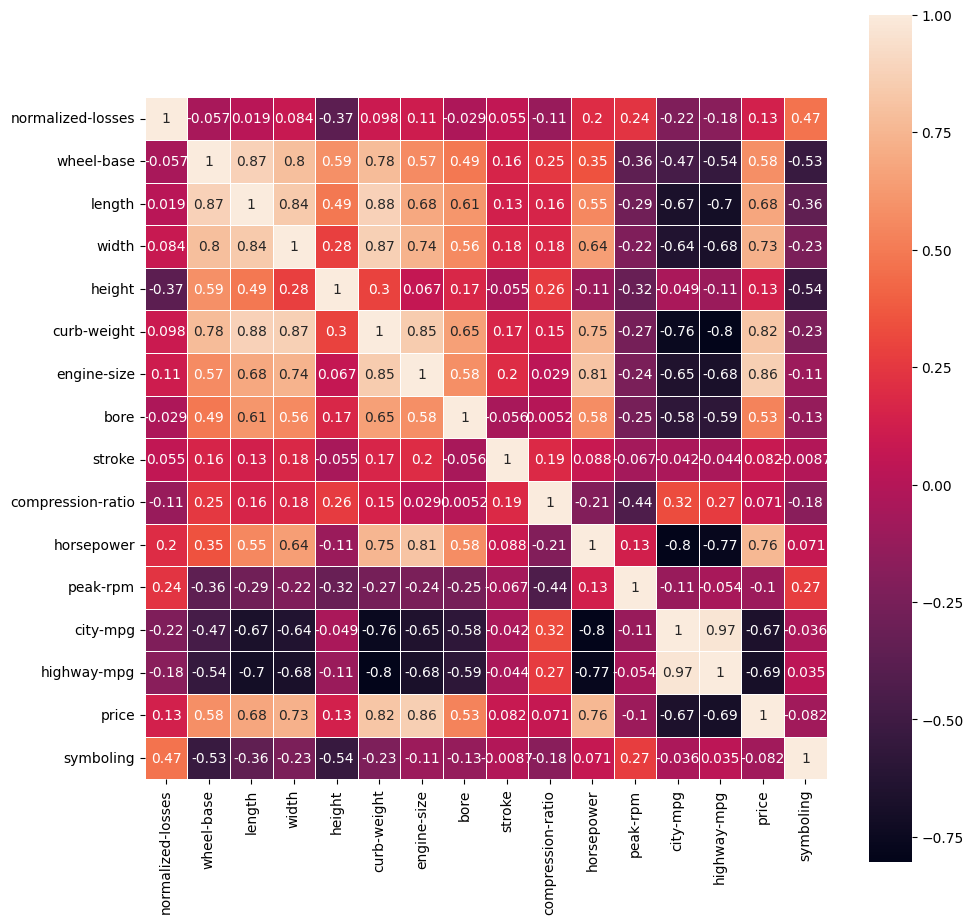

In [ ]:
#-- seleccionar los atributos numéricos --
df = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

# imprime valores nulos
print(df.isnull().sum())

nomAtrib = np.array(df.columns.values).reshape(-1,1)

#-- ver si tienen datos faltantes --
values = {'normalized-losses': df['normalized-losses'].mean(),
          'bore': df['bore'].mean(),
          'stroke': df['stroke'].mean(),
          'horsepower': df['horsepower'].mean(),
          'peak-rpm': df['peak-rpm'].mean(),
          'price': df['price'].mean()}

# reemplaza valores nulos por los indicados en el diccionario values
df = df.fillna(value=values)

# Imprime matriz de correclacion
corr = df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, square=True,  annot=True, linewidths=.5)


Normalización: 1


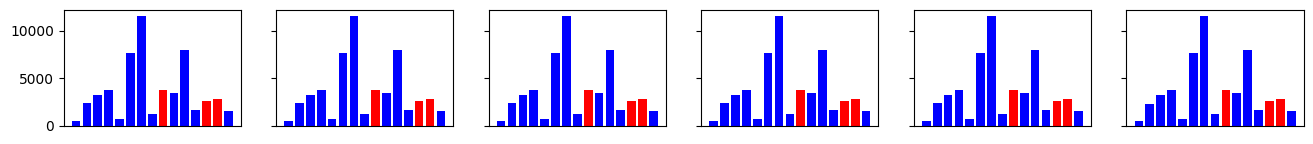

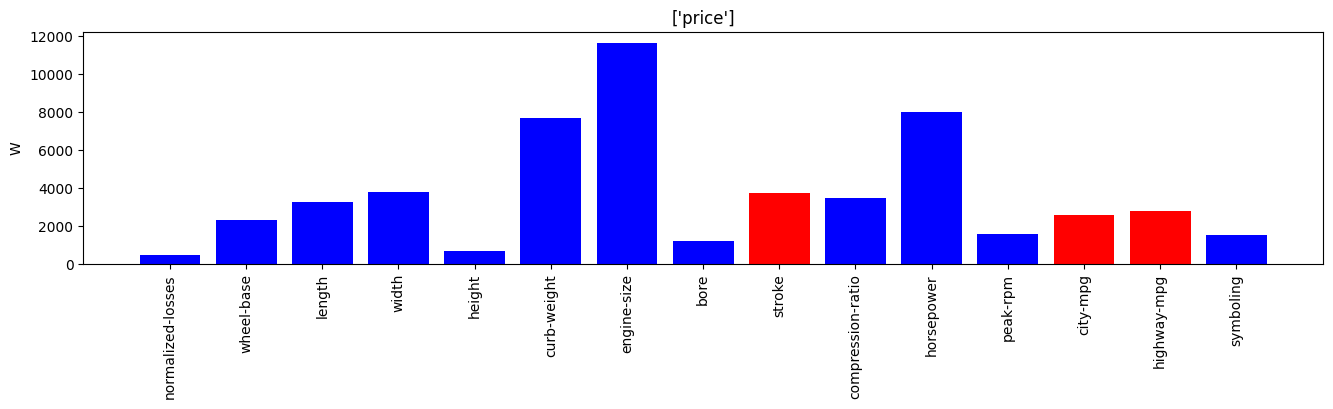

Normalización: 2


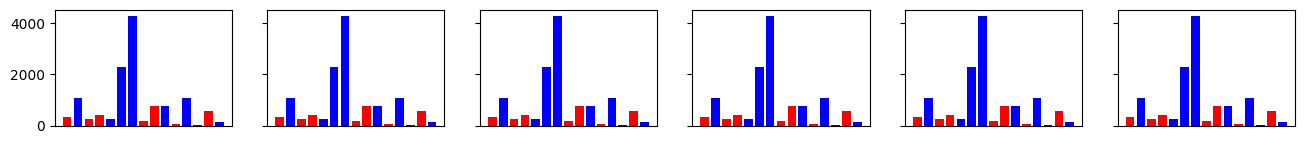

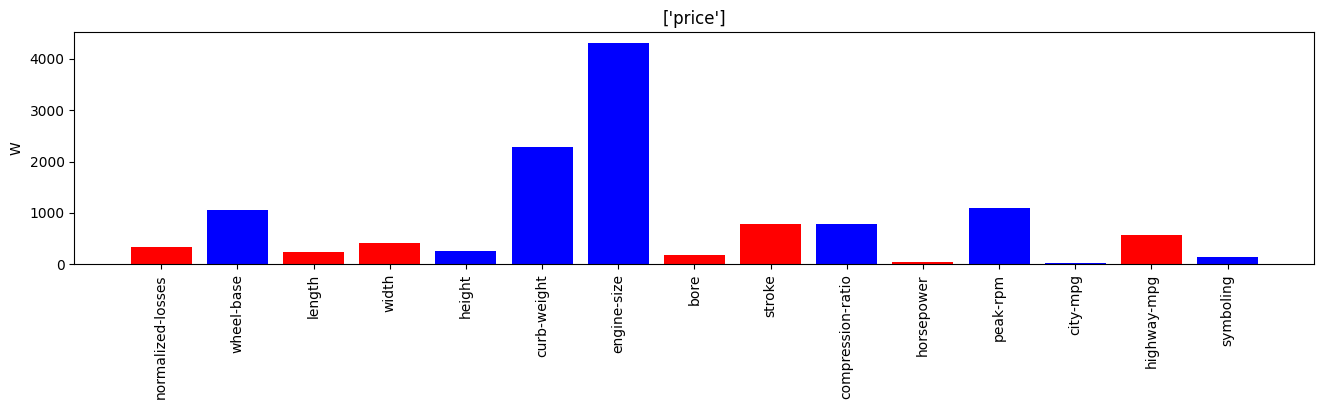

In [ ]:
Ejemplos = np.array(df)

# separa aributos y target
attPred = 14 #12 mpg y 14 precio  #-- nro de atributo a predecir
T = Ejemplos[:, attPred].reshape(-1,1) # (N,) => (N,1)
Ejemplos = np.delete(Ejemplos, [attPred], 1) #elimina la columna 12 a lo largo del eje 1

nomPred = nomAtrib[attPred]
nomCols = np.delete(nomAtrib, [attPred])

# alpha=0.01, n_iter=30 y cotaE=10e-06:
alfa = 0.01
MAX_ITE = 30
CotaError = 10e-06
CANT_PLOTS = 6

for normalizarEntrada in [1, 2]:
    # normalización
    if normalizarEntrada == 1:
        normalizador = preprocessing.MinMaxScaler()
        X = normalizador.fit_transform(Ejemplos)
    elif normalizarEntrada == 2:
        normalizador = preprocessing.StandardScaler()
        X = normalizador.fit_transform(Ejemplos)
    else:
        X = Ejemplos

    w_acc = np.zeros(len(nomCols)) # acumulador para pesos

    fig,subs=plt.subplots(1, CANT_PLOTS, sharex='col', sharey='row', figsize=(16,1.5))

    print('Normalización: %d' % normalizarEntrada)

    for i in range(0, CANT_PLOTS):
        modelo = NeuronaLineal(alpha=alfa, n_iter=MAX_ITE, cotaE=CotaError)
        modelo.fit(X, T)

        w_acc += modelo.w_ # acumula pesos para despues promediar

        # Colores para barras positivas y negativas. La idea es dibujarlas positivas
        # para comparar la magnitud y pintar de otro color las negativas
        colores = ['blue' if valor >= 0 else 'red' for valor in  modelo.w_]
        subs[i].bar(np.arange(len(modelo.w_)), np.abs(modelo.w_), color=colores)
        subs[i].set_xticks([])

    w_prom = w_acc / CANT_PLOTS

    # Colores para barras positivas y negativas
    colores = ['blue' if valor >= 0 else 'red' for valor in w_prom]

    barras = np.abs(w_prom)
    plt.figure(figsize=(16,4))
    N=len(barras)

    plt.bar(np.arange(N), barras, color=colores)   # Gráfico de barras
    plt.title(nomPred)           # Colocamos el título
    plt.ylabel('W')
    plt.xticks(np.arange(N), nomCols, rotation='vertical')
    plt.subplots_adjust(bottom=0.3)
    plt.show()

# **Ejercicio 10**

El archivo Semillas.csv contiene información de granos que pertenecen a tres variedades diferentes de
trigo.

Entrene una neurona no lineal para determinar si una semilla es de “TIPO 2” o no.

Utilice el 60% de los ejemplos para entrenar y el 40% para realizar el testeo.

Realice 30 ejecuciones independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la precisión obtenida tanto para el conjunto de entrenamiento como para el de testeo.

Utilice un máximo de 200 iteraciones y una cota de error de 1𝑒 − 03.

a) Utilizando ‘sigmoid’ como función de activación.

b) Utilizando ‘tanh’ como función de activación.

In [ ]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np
from google.colab import data_table

from sklearn import preprocessing, model_selection
from matplotlib import pyplot as plt

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaGral import NeuronaGradiente


data_table.enable_dataframe_formatter()


nombre_archivo = 'Semillas.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])
df

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


In [ ]:
X_raw = np.array(df.iloc[:,0:-1])  # recupera todas las columnas salvo la última (es la clase)
T_raw = np.array(df.iloc[:,-1])    # recupera solo la última columna (es la clase)

clases = np.unique(T_raw)  # obtiene las clases sin repeticiones
print('Las clases del dataset son :', clases)

# Normalizacion con media y desviacion
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X_raw)

Las clases del dataset son : ['Tipo1' 'Tipo2' 'Tipo3']


In [ ]:
###############################################################################
# neurona no lineal sigmoid
ERROR = 1e-03  # para detener el entrenamiento de la neurona
ALFA = 0.1
FUN = 'sigmoid'
MAX_ITE = 200

print('\nNeurona con %s' %FUN)

# Implementa una neurona no lineal con función de activación sigmoide y entrena
# esta neurona para clasificar diferentes clases.

# hace entrenamiento por cada clase
for cls_name in clases:
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    T = 1 * (T_raw == cls_name)

    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X, T)
    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    Y = modelo.predict(X)

    efectividad = 100.0*np.sum(Y==T)/len(Y)

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))




Neurona con sigmoid
Clase Tipo1 con  93.33% de efectividad con 200 iteraciones
Clase Tipo2 con  98.10% de efectividad con 200 iteraciones
Clase Tipo3 con  97.14% de efectividad con 200 iteraciones


In [ ]:
###############################################################################
# neurona no lineal sigmoid
ERROR = 1e-03
ALFA = 0.3
FUN = 'sigmoid'
MAX_ITE = 200
CORRIDAS = 30 # ejecuciones
TEST_SIZE = .4

print('\nNeurona con %s' %FUN)

# hace entrenamiento por cada clase
cls_name = 'Tipo2'
prom_ite = 0
prom_acc_train = 0
prom_acc_test = 0
veces_train = 0
veces_test = 0

T = 1*(T_raw==cls_name)

for nro_ite in range(CORRIDAS):
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, T, test_size=TEST_SIZE)#, random_state=42)
    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X_train, Y_train)

    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    prom_ite = prom_ite + iteraciones

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_train)
    efectividad = 100.0*np.sum(Y_train==Y_pred)/len(Y_pred)
    prom_acc_train = prom_acc_train + efectividad
    if (100-efectividad>0.0000001):
        veces_train = veces_train + 1

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_test)
    efectividad = 100.0*np.sum(Y_test==Y_pred)/len(Y_pred)
    prom_acc_test = prom_acc_test + efectividad
    if (100-efectividad>0.0000001):
      veces_test = veces_test + 1

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))

print('promedio iteraciones  : %6.2f' % (prom_ite/CORRIDAS))
print('promedio acc. train   : %6.2f' % (prom_acc_train/CORRIDAS))
print('promedio acc. test    : %6.2f' % (prom_acc_test/CORRIDAS))
print('ejec. train con 100%%  : %3d' % (veces_train))
print('ejec.  test con 100%%  : %3d' % (veces_test))


Neurona con sigmoid
Clase Tipo2 con 100.00% de efectividad con 200 iteraciones
Clase Tipo2 con 100.00% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  92.86% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 186 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con 100.00% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con  95.24% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  91.67% de efectividad con 88 iteraciones
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  95.24% de efectividad con 171 iteraciones
Clase Tipo2 con  97.62% de efectivid

In [ ]:
###############################################################################
# neurona no lineal tanh
ERROR = 1e-03
ALFA = 0.3
FUN = 'tanh'
MAX_ITE = 200
CORRIDAS = 30
TEST_SIZE = .4

print('\nNeurona con %s' %FUN)

cls_name = 'Tipo2'
prom_ite = 0
prom_acc_train = 0
prom_acc_test = 0
veces_train = 0
veces_test = 0

T = 2*(T_raw==cls_name)-1

for nro_ite in range(CORRIDAS):
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, T, test_size=TEST_SIZE)#, random_state=42)
    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X_train, Y_train)

    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    prom_ite = prom_ite + iteraciones

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_train)
    efectividad = 100.0*np.sum(Y_train==Y_pred)/len(Y_pred)
    prom_acc_train = prom_acc_train + efectividad
    if (100-efectividad>0.0000001):
      veces_train = veces_train + 1

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_test)
    efectividad = 100.0*np.sum(Y_test==Y_pred)/len(Y_pred)
    prom_acc_test = prom_acc_test + efectividad
    if (100-efectividad>0.0000001):
      veces_test = veces_test + 1

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))

print('promedio iteraciones  : %6.2f' % (prom_ite/CORRIDAS))
print('promedio acc. train   : %6.2f' % (prom_acc_train/CORRIDAS))
print('promedio acc. test    : %6.2f' % (prom_acc_test/CORRIDAS))
print('ejec. train con 100%%  : %3d' % (veces_train))
print('ejec.  test con 100%%  : %3d' % (veces_test))


Neurona con tanh
Clase Tipo2 con  96.43% de efectividad con 76 iteraciones
Clase Tipo2 con  96.43% de efectividad con 126 iteraciones
Clase Tipo2 con  95.24% de efectividad con 165 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con 100.00% de efectividad con 200 iteraciones
Clase Tipo2 con  95.24% de efectividad con 89 iteraciones
Clase Tipo2 con  96.43% de efectividad con 76 iteraciones
Clase Tipo2 con 100.00% de efectividad con 200 iteraciones
Clase Tipo2 con  94.05% de efectividad con 166 iteraciones
Clase Tipo2 con  97.62% de efectividad con 94 iteraciones
Clase Tipo2 con  97.62% de efectividad con 151 iteraciones
Clase Tipo2 con  96.43% de efectividad con 187 iteraciones
Clase Tipo2 con  96.43% de efectividad con 185 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 106 iteraciones
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con 100.00% de efectividad con

# **Ejercicio 10**

In [ ]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np
from google.colab import data_table

from sklearn import preprocessing, model_selection
from matplotlib import pyplot as plt

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaGral import NeuronaGradiente


data_table.enable_dataframe_formatter()


nombre_archivo = 'hojas.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])
df

,Perimetro,Area,Clase
0,667.997041,3793,Hoja
1,784.246825,2574,Helecho
2,367.747258,3582,Hoja
3,901.595021,5068,Helecho
4,949.175757,12216,Hoja
5,763.269119,980,Helecho
6,197.580736,3370,Hoja
7,799.619408,1669,Helecho
8,452.475180,3585,Hoja
9,1564.482323,2964,Helecho


In [ ]:
###############################################################################
# neurona no lineal sigmoid
ERROR = 1e-03
ALFA = 0.1
FUN = 'sigmoid'
MAX_ITE = 200

print('\nNeurona con %s' %FUN)


# hace entrenamiento por cada clase
for cls_name in clases:
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    T = 1 * (T_raw == cls_name)

    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X, T)
    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    Y = modelo.predict(X)

    efectividad = 100.0*np.sum(Y==T)/len(Y)

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))



In [ ]:
###############################################################################
# neurona no lineal tanh
ERROR = 1e-03
ALFA = 0.3
FUN = 'tanh'
MAX_ITE = 200
CORRIDAS = 30
TEST_SIZE = .4

print('\nNeurona con %s' %FUN)

cls_name = 'Tipo2'
prom_ite = 0
prom_acc_train = 0
prom_acc_test = 0
veces_train = 0
veces_test = 0

T = 2*(T_raw==cls_name)-1

for nro_ite in range(CORRIDAS):
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, T, test_size=TEST_SIZE)#, random_state=42)
    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X_train, Y_train)

    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    prom_ite = prom_ite + iteraciones

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_train)
    efectividad = 100.0*np.sum(Y_train==Y_pred)/len(Y_pred)
    prom_acc_train = prom_acc_train + efectividad
    if (100-efectividad>0.0000001):
      veces_train = veces_train + 1

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_test)
    efectividad = 100.0*np.sum(Y_test==Y_pred)/len(Y_pred)
    prom_acc_test = prom_acc_test + efectividad
    if (100-efectividad>0.0000001):
      veces_test = veces_test + 1

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))

print('promedio iteraciones  : %6.2f' % (prom_ite/CORRIDAS))
print('promedio acc. train   : %6.2f' % (prom_acc_train/CORRIDAS))
print('promedio acc. test    : %6.2f' % (prom_acc_test/CORRIDAS))
print('ejec. train con 100%%  : %3d' % (veces_train))
print('ejec.  test con 100%%  : %3d' % (veces_test))